##### REGRESIÓN LINEAL MULTIVARIABLE. CON CORR

In [24]:
#Se importan la librerias a utilizar
from sklearn import datasets, linear_model

#Datos

import pandas as pd
import numpy as np
import os

# Grafica
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns



In [13]:
# Datos
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/' +
       'Estadistica-machine-learning-python/master/data/SaratogaHouses.csv')
datos = pd.read_csv(url, sep=",")

# Se renombran las columnas para que sean más descriptivas
datos.columns = ["precio", "metros_totales", "antiguedad", "precio_terreno",
                 "metros_habitables", "universitarios", "dormitorios", 
                 "chimenea", "banyos", "habitaciones", "calefaccion",
                 "consumo_calefacion", "desague", "vistas_lago",
                 "nueva_construccion", "aire_acondicionado"]
       
# Variables numéricas
#datos = datos.select_dtypes(include=['float64', 'int'])
datos.head(10)

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes
5,120000,0.68,31,14000,1152,22,4,1,1.0,8,hot air,gas,septic,No,No,No
6,153000,0.40,33,23300,2752,51,4,1,1.5,8,hot water/steam,oil,septic,No,No,No
7,170000,1.21,23,14600,1662,35,4,1,1.5,9,hot air,oil,septic,No,No,No
8,90000,0.83,36,22200,1632,51,3,0,1.5,8,electric,electric,septic,No,No,No
9,122900,1.94,4,21200,1416,44,3,0,1.5,6,hot air,gas,none,No,No,No


In [14]:
# Matriz de correlación
# ==============================================================================
corr_matrix = datos.corr(method='pearson')
corr_matrix

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones
precio,1.000000,0.158333,-0.188793,0.581266,0.712390,0.200119,0.400349,0.376786,0.597250,0.531170
metros_totales,0.158333,1.000000,-0.016352,0.059222,0.163450,-0.033148,0.113982,0.085226,0.084823,0.137604
antiguedad,-0.188793,-0.016352,1.000000,-0.021818,-0.174242,-0.037785,0.027125,-0.172022,-0.361897,-0.082264
precio_terreno,0.581266,0.059222,-0.021818,1.000000,0.423441,0.228427,0.202449,0.211727,0.297498,0.298865
metros_habitables,0.712390,0.163450,-0.174242,0.423441,1.000000,0.209981,0.656196,0.473788,0.718564,0.733666
universitarios,0.200119,-0.033148,-0.037785,0.228427,0.209981,1.000000,0.162919,0.246626,0.179541,0.157068
dormitorios,0.400349,0.113982,0.027125,0.202449,0.656196,0.162919,1.000000,0.284475,0.458033,0.671863
chimenea,0.376786,0.085226,-0.172022,0.211727,0.473788,0.246626,0.284475,1.000000,0.436234,0.319894
banyos,0.597250,0.084823,-0.361897,0.297498,0.718564,0.179541,0.458033,0.436234,1.000000,0.517585
habitaciones,0.531170,0.137604,-0.082264,0.298865,0.733666,0.157068,0.671863,0.319894,0.517585,1.000000


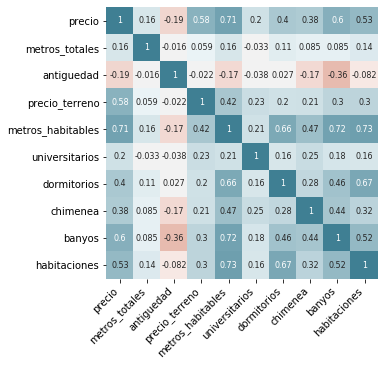

In [12]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

El precio lo podemos ver que es linealmente dependiente de los metros (0.71) de  dormitorios (0.4) los Baños (0.6) y Habitaciones (0.53)

In [26]:
#Seleccionamos las columna 4, 6 8 y 9 del dataset

X_multiple = datos.iloc[:, [4, 6 , *range(8,9)]]

In [27]:
#Defino los datos correspondientes a las etiquetas
y_multiple = datos.precio

Como ya tenemos nuestros datos ahora procedemos a separarlos en entrenamiento y prueba lo hacemos utilizando la instrucción train_test_split, no si antes importando la respectiva librería.

Para la separación de los datos, vamos a tomar un 20% de los mismos para utilizarlos como prueba una vez que hayamos obtenido el modelo.

In [28]:
from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.2)

Seguidamente definimos el algoritmo a utilizar que es el de LinearRegression.

In [29]:
#Defino el algoritmo a utilizar
lr_multiple = linear_model.LinearRegression()

Definido el algoritmo ahora procedemos a entrenar nuestro modelo con los datos correspondiente, para ello utilizamos la instrucción fit.

In [30]:
#Entreno el modelo
lr_multiple.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
#Realizo una predicción
Y_pred_multiple = lr_multiple.predict(X_test)
#print((Y_pred_multiple),(y_test))


import pandas as pd


#print(Y_pred_multiple,y_test)



In [36]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
print('Valor de las pendientes o coeficientes "a":')
print(lr_multiple.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr_multiple.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Valor de las pendientes o coeficientes "a":
[   106.18899653 -14398.0169341   25769.17119378]
Valor de la intersección o coeficiente "b":
21497.365980884875


In [37]:
print('Precisión del modelo:')
print(lr_multiple.score(X_train, y_train))

Precisión del modelo:
0.5411915376191887


Conclusión : Se puede variar los datos para tener un mejor precisión del  modelo 